<h1>¿Qué es el algoritmo KNN?</h1>
Es un algoritmo de <b>clasificación</b>, que funciona identificando los vecinos más cercanos de un punto de consulta determinado para asignarle una etiqueta de clase.<br>
Toma el promedio de los vecinos más cercanos para hacer una predicción.<br><br>
<b>Es un modelo de "aprendizaje vago", no se somete a una etapa de entrenamiento, almacena el conjunto de datos de entrenamiento en memoria.</b>

<h2>Aplicaciones</h2>
- <b>Preprocesamiento de datos:</b> estimar los valores de datos desconocidos en un conjunto de datos.<br>
- <b>Motores de recomendación:</b> recomendaciones automáticas pero no óptimo para conjuntos de datos grandes.<br>
- <b>Finanzas:</b> previsiones del mercado bursátil, análisis del blanqueo de dinero...<br>
- <b>Sanidad:</b> predicciones de riesgos de ataques cardiacos o cáncer de próstada... Calcula las expresiones genéticas más probables.<br>
- <b>Reconocimiento de patrones:</b> identificar números.


<h2>Ventajas y desventajas</h2>
<h3>Ventajas</h3>
- Fácil de implementar.<br>
- Se adapta fácilmente a nuevas muestras de entrenamiento porque los datos de entrenamiento se almacenan en memoria.<br>
- Solo requiere dos hiperparámetros: k y la métrica de distancia.
<h3>Desventajas</h3>
- Mala escalabilidad porque ocupa más memoria y almacenamiento que otros clasificadores.<br>
- Propenso al sobreajuste, sobretodo con valores bajos de k, y con valores k demasiado altos el modelo puede infraajustarse.<br>
- No funciona bien con entradas de datos de alta dimensión. Cuando el algoritmo alcanza el número óptico de características, las características adicionales aumentan la cantidad de errores.

<h2>Hiperparámetros</h2>
- <b>Métrica de distancia (p):</b> sirven para calcular la distancia entre el punto de consulta y los demás puntos de datos.<br>
- <b>Número de vecinos (k)</b>: define cuántos vecinos se comprobarán para determinar la etiqueta del punto de consulta. Es recomendable que k sea un número impar para evitar empates en la clasificación.<br>
<br>
<img src=https://machine-learning-tutorial-abi.readthedocs.io/en/latest/_images/knn.png>

Las dos métricas de distancia más utilizadas son la <b>distancia euclídea</b> y la <b>distancia de Manhattan</b>.


<h3>Distancia euclídea. p=2</h3>
Mide una línea recta entre el punto de consulta y el otro punto medido.


<h3>Distancia de Manhattan. p=1</h3>
Mide el valor absoluto entre dos puntos.

<img src=https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png>

<h1>Ejemplo con datos introducidos manualmente</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

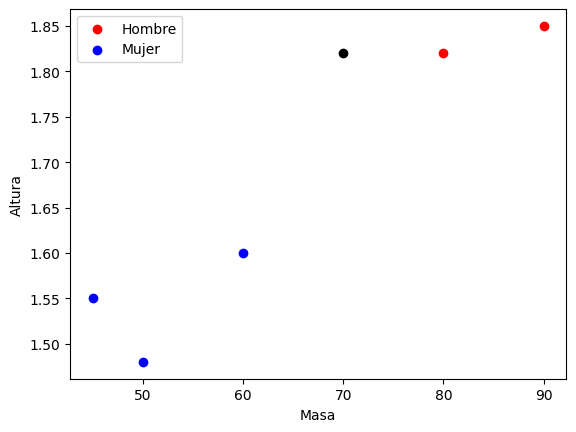

In [1]:
# Importamos las librerías
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Creamos los datos
data = {'Masa': [50, 80, 90, 45, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

# Creamos el punto que queremos clasificar
newPoint = {'Masa': [70],
            'Altura': [1.82]}

# Creamos un dataframe con los datos que hemos introducido
df = pd.DataFrame(data)
newPoint = pd.DataFrame(newPoint)

# Representamos gráficamente los datos introducidos
ax = plt.axes()
ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'],
           df.loc[df['Genero'] == 'h', 'Altura'], 
           c='red', label='Hombre')

ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c='blue', label='Mujer')

ax.scatter(newPoint['Masa'],
           newPoint['Altura'],
           c='black')

plt.xlabel('Masa')
plt.ylabel('Altura')
ax.legend()
plt.show

In [2]:
# Entrenamos el modelo
# Skicit utiliza por defecto la distancia métrica euclídea (p=2)
knn = KNeighborsClassifier(n_neighbors=3)
X = df[['Masa', 'Altura']] # Etiquetas que conocemos del punto de consulta
y = df[['Genero']] # Etiqueta a adivinar
knn.fit(X, y)
prediction = knn.predict(newPoint)
print(prediction)

c:\Users\lds98\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['h']


Como hemos observado en el gráfico, el punto de consulta es más cercano a los puntos con la etiqueta de 'hombre', y ese es el resultado que ha devuelto nuestro modelo.

<h1>Ejemplo con CSV</h1>

In [3]:
# Importamos las librerías
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Cargamos nuestro csv
data = pd.read_csv('Iris.csv')
df = pd.DataFrame(data)

# Mostramos la cabecera del dataset para ver las columnas que tenemos
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Vemos las diferentes especies de iris que tenemos
set(df['Species'])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [5]:
# Comprobamos si hay valores nulos en el dataset para hacer una limpieza
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Creamos nuevos datos y los metemos en un DataFrame
newData = {'SepalLengthCm': [5, 7, 6],
           'SepalWidthCm': [3, 2, 3],
           'PetalLengthCm': [1, 6, 4],
           'PetalWidthCm': [0, 1, 2]}

newData = pd.DataFrame(newData)

# Entrenamos el modelo
knn = KNeighborsClassifier(n_neighbors=5)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # Ignoramos la columna Id
y = df[['Species']]
knn.fit(X, y)
prediction = knn.predict(newData)
prediction

c:\Users\lds98\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

Ahora representaremos visualmente los datos del dataset y los datos que hemos creado para comprobar que la predicción concuerda con lo esperado.

<function matplotlib.pyplot.show(close=None, block=None)>

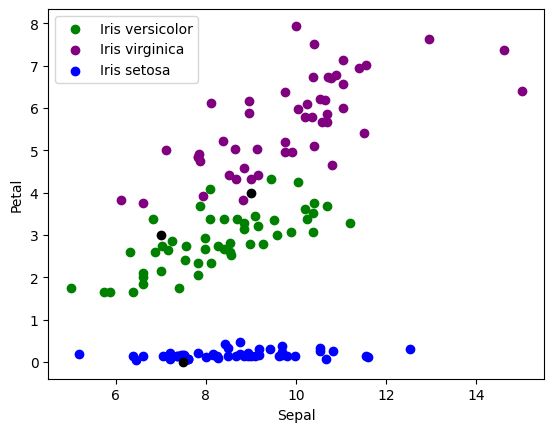

In [7]:
# Representamos gráficamente los datos introducidos
# Hacemos una media de la altura y ancho de los sépalos y los pétalos para representarlos gráficamente
df['Sepal'] = df['SepalLengthCm']*df['SepalWidthCm']/2
df['Petal'] = df['PetalLengthCm']*df['PetalWidthCm']/2

ax = plt.axes()
ax.scatter(df.loc[df['Species'] == 'Iris-versicolor', 'Sepal'],
           df.loc[df['Species'] == 'Iris-versicolor', 'Petal'],
           c='green', label='Iris versicolor')

ax.scatter(df.loc[df['Species'] == 'Iris-virginica', 'Sepal'],
           df.loc[df['Species'] == 'Iris-virginica', 'Petal'],
           c='purple', label='Iris virginica')

ax.scatter(df.loc[df['Species'] == 'Iris-setosa', 'Sepal'],
           df.loc[df['Species'] == 'Iris-setosa', 'Petal'],
           c='blue', label='Iris setosa')

# Hacemos la media para los nuevos datos también
newData['Sepal'] = newData['SepalLengthCm']*newData['SepalWidthCm']/2
newData['Petal'] = newData['PetalLengthCm']*newData['PetalWidthCm']/2

ax.scatter(newData['Sepal'],
           newData['Petal'],
           c='black')

plt.xlabel('Sepal')
plt.ylabel('Petal')
ax.legend()
plt.show